# Проект: анализ покупок пользователей интернет-магазина.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date,timedelta

In [2]:
customers = pd.read_csv('olist_customers_dataset.csv')
order = pd.read_csv('olist_orders_dataset.csv',\
                     parse_dates = ['order_purchase_timestamp','order_approved_at',\
                                     'order_delivered_carrier_date','order_delivered_customer_date',\
                                     'order_estimated_delivery_date'])
order_items = pd.read_csv('olist_order_items_dataset.csv', parse_dates = ['shipping_limit_date'])

In [2]:
def size_dataframe(df):
    """
    Функция для определения размера датафрейма
    
    Параметры: 
    ----------
    df: датафрейм
    
    """
    rows, cols = df.shape #размер 
    print(f'Размер dataframe rows = {rows} и cols = {cols}')

In [5]:
def cnt_day_in_month(x):
    """
    Функция подсчёта количества дней в месяце
    
    Параметры: 
    ----------
    x: столбец с датами
    
    """
    lst = []
    for i in x:
         lst.append(pd.Period(i).days_in_month)
    return lst

### Изучим информация о данных по клиентам

In [118]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


#### Какие поля таблицы содержат Nan значения

In [119]:
customers.isna().any()

customer_id                 False
customer_unique_id          False
customer_zip_code_prefix    False
customer_city               False
customer_state              False
dtype: bool

- Полей, содержащих Nan значения в таблице нет 

In [120]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [121]:
size_dataframe(customers)

Размер dataframe rows = 99441 и cols = 5


### Изучим информацию о данных по заказам

In [122]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


#### Поля таблицы  order содержащие хотя бы одно Nan значение

In [123]:
order.columns[order.isna().any()].tolist()

['order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date']

In [124]:
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [125]:
size_dataframe(order)

Размер dataframe rows = 99441 и cols = 8


#### Разберёмся в возможных статусах заказа 'order_status' таблицы order

In [126]:
# Какие значения принимает колонка order_status и подсчитать их количество 
order['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [127]:
#  статус 'shipped' отгружен со склада и находится в пути
order.query("order_status == 'shipped'").head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
162,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,NaT,2017-06-08
231,4d630f57194f5aba1a3d12ce23e71cd9,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,NaT,2017-12-13
299,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,NaT,2018-08-03


In [128]:
#  статус 'canceled' заказ отменён
order.query("order_status == 'canceled'").head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17


In [129]:
#  статус 'created' заказ оформлен, но не оплачен
order.query("order_status == 'created'").head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
7434,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,NaT,NaT,NaT,2018-01-11
9238,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,NaT,NaT,NaT,2018-03-07
21441,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33,NaT,NaT,NaT,2017-12-12
55086,35de4050331c6c644cddc86f4f2d0d64,4ee64f4bfc542546f422da0aeb462853,created,2017-12-05 01:07:58,NaT,NaT,NaT,2018-01-08
58958,90ab3e7d52544ec7bc3363c82689965f,7d61b9f4f216052ba664f22e9c504ef1,created,2017-11-06 13:12:34,NaT,NaT,NaT,2017-12-01


In [130]:
#  статус 'approved' заказ подтверждён, но не оплачен
order.query("order_status == 'approved'")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44897,a2e4c44360b4a57bdff22f3a4630c173,8886130db0ea6e9e70ba0b03d7c0d286,approved,2017-02-06 20:18:17,2017-02-06 20:30:19,NaT,NaT,2017-03-01
88457,132f1e724165a07f6362532bfb97486e,b2191912d8ad6eac2e4dc3b6e1459515,approved,2017-04-25 01:25:34,2017-04-30 20:32:41,NaT,NaT,2017-05-22


In [131]:
#  статус 'invoiced' заказ оплачен и готовится к процессу сборки
order.query("order_status == 'invoiced'").head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
455,38b7efdf33dd5561f4f5d4f6e07b0414,021e84751ba0ead75b6d314a6ead88d9,invoiced,2017-08-01 18:17:41,2017-08-01 18:32:30,NaT,NaT,2017-08-28
1833,51b0dccc8596ce37a930dff2d63a10a2,31bf1057b00f14804278590bbac18b1b,invoiced,2017-05-05 22:34:48,2017-05-05 22:45:12,NaT,NaT,2017-06-06
2116,5504eaa5a86eb25fa666cf2e6b96c701,a30be38e1ed0ffb39b318bf1d15e98d9,invoiced,2017-11-29 08:33:06,2017-11-29 08:56:23,NaT,NaT,2017-12-20


In [132]:
# статус 'processing' - заказ оплачен и находится в процессе сборки 
order.query("order_status == 'processing'").head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09
741,6a6c7d523fd59eb5bbefc007331af717,d954782ec6c0e911292c8a80757ef28d,processing,2017-11-24 20:09:33,2017-11-24 23:15:15,NaT,NaT,2017-12-20
1192,745e1d4a7f8c4b548881788d4113bb1d,7198d7088442e4ddfe553353d8ddc957,processing,2017-11-17 06:34:36,2017-11-18 02:15:40,NaT,NaT,2017-12-12
1516,1d52ba7197c7acebbb4f826f6585536f,c9c7fe860d602373a9e93f8bfe9d877a,processing,2017-02-13 18:32:55,2017-02-13 18:43:55,NaT,NaT,2017-04-04


In [133]:
# Что значит статус заказа 'unavailable'
order.query("order_status == 'unavailable'")
# значит,что заказ был оплачен,но не отгружен со склада и не передан в доставку  

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05
737,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06
1160,2f634e2cebf8c0283e7ef0989f77d217,7353b0fb8e8d9675e3a704c60ca44ebe,unavailable,2017-09-27 20:55:33,2017-09-28 01:32:50,NaT,NaT,2017-10-27
...,...,...,...,...,...,...,...,...
99147,6cf5c427fb11bc5fe8abefa86aa7ba0b,91ac14a1e50bc022eeecf0c2ba37006a,unavailable,2017-10-17 10:53:48,2017-10-19 03:12:43,NaT,NaT,2017-10-27
99233,1c7c8ab324927f5b6e52338bd110bef4,95b1767df51d6fa09402267d8de314df,unavailable,2017-12-23 18:48:09,2017-12-23 18:54:22,NaT,NaT,2018-01-19
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaT,NaT,2018-02-06
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


### Изучим информацию о данных по товарам

In [134]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Какие поля таблицы содержат Nan значения

In [135]:
order_items.isna().any()

order_id               False
order_item_id          False
product_id             False
seller_id              False
shipping_limit_date    False
price                  False
freight_value          False
dtype: bool

- Полей, содержащих Nan значения нет 

In [136]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [137]:
size_dataframe(order_items)

Размер dataframe rows = 112650 и cols = 7


#### Проверим, встречаются ли в данных повторяющиеся наблюдения

In [138]:
customers.loc[customers.duplicated()].value_counts()

Series([], dtype: int64)

In [139]:
order.loc[order.duplicated()].value_counts()

Series([], dtype: int64)

In [140]:
order_items.loc[order_items.duplicated()].value_counts()

Series([], dtype: int64)

- Повторяющихся наблюдений в данных нет 

# 1. Определим  пользователей, которые совершили покупку только один раз

- Считаем покупку совершенной, если она была доставлена покупателю

Имеются данные по заказам со статусом 'delivered', но отсутствующей датой доставки пользователю(order_delivered_customer_date).Возможно, какой-то программный сбой, такие данные при анализе учитывать не будем

In [141]:
# данные, которые не стоит учитывать при анализе
order.query('order_delivered_customer_date == "NaT" and order_status == "delivered"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19


In [142]:
# Отберём заказы со статусом "delivered" и 'order_delivered_customer_date' is not NaT
order_is_delivered = order.query("order_status == 'delivered' and order_delivered_customer_date != 'NaT'")
order_is_delivered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [143]:
#  Соединим две таблицы  -customers c order_is_canceled_after_payment
customers.merge(order_is_delivered, on = 'customer_id')\
            .groupby('customer_unique_id', as_index = False)\
            .agg({'customer_id':'count'})\
            .rename(columns = {'customer_id':'count_order'})\
            .query('count_order == 1')

,customer_unique_id,count_order
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
93345,fffcf5a5ff07b0908bd4e2dbc735a684,1
93346,fffea47cd6d3cc0a88bd621562a9d061,1
93347,ffff371b4d645b6ecea244b27531430a,1
93348,ffff5962728ec6157033ef9805bacc48,1


- id пользователей, которые совершили покупку только один раз находится в столбце 'customer_unique_id'

# 2.Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)

Заказ считает в процессе доставки после подтверждения оплаты и передачи заказа в логистическую службу 

Один из вариантов, почему заказ не был доставлен: пользователь отменил заказ после того, как товар был отгружен со склада и передан в логистическую службу.

In [144]:
# все заказы со статусом 'canceled'
order_is_canceled = order.query("order_status == 'canceled'")
order_is_canceled.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1811,0966b61e30c4a07edbd7523f59b3f3e4,2fcc597b8934d99715dbfff7909dd27f,canceled,2018-05-22 18:50:55,2018-05-22 19:17:15,NaT,NaT,2018-07-03
1819,9021cf1919f615a121410790dcce848f,7acf55df0298e1d2c31200fb4f6fb93b,canceled,2018-07-04 16:05:56,2018-07-06 02:55:16,NaT,NaT,2018-08-22
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
1971,a39d3db795a5cf4c8b6c9dd050f0d326,ec66df2cb66dfda07c03050470e21f69,canceled,2017-03-13 16:12:24,2017-03-13 16:12:24,NaT,NaT,2017-03-30
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13


In [145]:
size_dataframe(order_is_canceled)

Размер dataframe rows = 625 и cols = 8


In [146]:
# удалим строки с отсутс. датой доставки клиенту
df = order_is_canceled.dropna(subset = ['order_delivered_carrier_date'])
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23
2921,1950d777989f6a877539f53795b4c3c3,1bccb206de9f0f25adc6871a1bcf77b2,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-02-20 19:57:13,2018-03-21 22:03:51,2018-03-09
5127,8a9cce19aa49e055f2babb81d5a71c40,f2676ef361959c938b35ecd32321adce,canceled,2018-02-01 10:04:20,2018-02-03 02:52:42,2018-02-05 20:41:28,NaT,2018-02-23
5449,c1049eef89915c6beb3604bf3d6588d7,ed16865bcadcea1a00a928bf418a74bf,canceled,2018-02-05 23:08:11,2018-02-05 23:29:26,2018-02-09 22:13:01,NaT,2018-03-07
...,...,...,...,...,...,...,...,...
94175,c9f06c1229ec7cd4ec9aed55d434b499,fa89053140d09081b3a3a4608a74c083,canceled,2018-02-05 20:26:29,2018-02-05 20:49:48,2018-02-06 19:49:32,NaT,2018-03-01
94399,2c45c33d2f9cb8ff8b1c86cc28c11c30,de4caa97afa80c8eeac2ff4c8da5b72e,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08
96300,1def7af24cb7182497acfd953f6dd88b,b35c38c2cd6a72b58cb104154d9782e4,canceled,2017-12-21 09:22:36,2017-12-23 02:12:37,2018-01-30 19:28:55,NaT,2018-02-20
97207,716bcd6dfe99970baf4aed2083136ed8,42715bff8f22b8dc62e5055b1e9fef7e,canceled,2018-02-03 13:37:35,2018-02-03 13:50:26,2018-02-05 19:59:59,NaT,2018-03-01


In [147]:
size_dataframe(df)

Размер dataframe rows = 75 и cols = 8


In [148]:
# извлечём номер месяца из 'order_purchase_timestamp'
df['order_purchase_timestamp'] = df['order_purchase_timestamp'].dt.month
df

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,1,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,1,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23
2921,1950d777989f6a877539f53795b4c3c3,1bccb206de9f0f25adc6871a1bcf77b2,canceled,2,2018-02-19 20:56:05,2018-02-20 19:57:13,2018-03-21 22:03:51,2018-03-09
5127,8a9cce19aa49e055f2babb81d5a71c40,f2676ef361959c938b35ecd32321adce,canceled,2,2018-02-03 02:52:42,2018-02-05 20:41:28,NaT,2018-02-23
5449,c1049eef89915c6beb3604bf3d6588d7,ed16865bcadcea1a00a928bf418a74bf,canceled,2,2018-02-05 23:29:26,2018-02-09 22:13:01,NaT,2018-03-07
...,...,...,...,...,...,...,...,...
94175,c9f06c1229ec7cd4ec9aed55d434b499,fa89053140d09081b3a3a4608a74c083,canceled,2,2018-02-05 20:49:48,2018-02-06 19:49:32,NaT,2018-03-01
94399,2c45c33d2f9cb8ff8b1c86cc28c11c30,de4caa97afa80c8eeac2ff4c8da5b72e,canceled,10,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08
96300,1def7af24cb7182497acfd953f6dd88b,b35c38c2cd6a72b58cb104154d9782e4,canceled,12,2017-12-23 02:12:37,2018-01-30 19:28:55,NaT,2018-02-20
97207,716bcd6dfe99970baf4aed2083136ed8,42715bff8f22b8dc62e5055b1e9fef7e,canceled,2,2018-02-03 13:50:26,2018-02-05 19:59:59,NaT,2018-03-01


In [149]:
# посчитаем среднее число отменённых заказов
df['order_purchase_timestamp'].value_counts().mean()

15.0

- В среднем не доставляются 15 заказов в месяц по причине отмены заказа пользователем после того, как товар был отгружен со склада и передан в логистическую службу.

# 3. По каждому товару определить, в какой день недели товар чаще всего покупается

- Ранее мы определили, какие покупки считаются совершёнными, переменная order_is_delivered

In [150]:
# объединим необходимые для анализа датафреймы
items_is_delivered = order_is_delivered.merge(order_items, on = 'order_id')
items_is_delivered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110184,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
110185,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
110186,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
110187,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [151]:
# извлечём день недели из колонки время создания заказа(order_purchase_timestamp)
items_is_delivered['order_purchase_timestamp'] = items_is_delivered['order_purchase_timestamp'].dt.day_name()
items_is_delivered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,Monday,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,Tuesday,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,Wednesday,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,Saturday,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,Tuesday,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110184,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,Tuesday,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
110185,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,Sunday,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
110186,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,Monday,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
110187,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,Monday,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [153]:
# для каждого товара определим, в какой день недели он чаще всего покупается
items_is_delivered.groupby(["product_id", "order_purchase_timestamp"], as_index=False) \
    .agg({"customer_id": "count"})\
    .sort_values(by="customer_id", ascending=False) \
    .drop_duplicates(subset='product_id')\
    .rename(columns = {'customer_id' : 'max_count'})

,product_id,order_purchase_timestamp,max_count
15595,422879e10f46682990de24d770e7f83d,Wednesday,93
35749,99a4788cb24856965c36a24e339b6058,Monday,91
40180,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
19709,53b36df67ebb7c41585e8d54d6772e08,Tuesday,76
13269,389d119b48cf3043d311335e499d9c6b,Thursday,67
...,...,...,...
23481,64123627d4116a2bc8284f1bc0a257f3,Saturday,1
23489,6413f8d0daa3a38887a14917589e7da5,Wednesday,1
23491,641444946fe3a839d726c32804cd1aff,Tuesday,1
23492,6416e0ecd625ef4adf18658a9aca2e10,Thursday,1


# 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 

- Обединим 3 датафрейма в один 

In [154]:
customers_orders = customers.merge(order, on = 'customer_id', how = 'inner')
customers_orders

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05


In [155]:
union_df = customers_orders.merge(order_items, on = 'order_id', how = 'inner')
union_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07


- перменная union_df - объединяет в себе три датафрейма

- Нас интересуют данные в разрезе месяца

In [156]:
# Извлечём часть даты из столбца order_purchase_timestamp
union_df.order_purchase_timestamp = union_df.order_purchase_timestamp.dt.strftime('%Y-%m')

In [157]:
# убедимся, что извлекли дату правильно
union_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07


In [158]:
#выводим по каждому пользователю кол-во покупок в каждый месяц
df = union_df \
    .groupby(["customer_unique_id", "order_purchase_timestamp"], as_index=False) \
    .agg({"customer_city":"count"})\
    .rename(columns = {'customer_city' : 'cnt_purchases'})

df

,customer_unique_id,order_purchase_timestamp,cnt_purchases
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1
2,0000f46a3911fa3c0805444483337064,2017-03,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1
...,...,...,...
97314,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,2
97315,fffea47cd6d3cc0a88bd621562a9d061,2017-12,1
97316,ffff371b4d645b6ecea244b27531430a,2017-02,1
97317,ffff5962728ec6157033ef9805bacc48,2018-05,1


In [159]:
df.dtypes

customer_unique_id          object
order_purchase_timestamp    object
cnt_purchases                int64
dtype: object

In [160]:
# преобразуем колонку order_purchase_timestamp в строковый тип данных
df.order_purchase_timestamp = df.order_purchase_timestamp.astype('str')

In [161]:
df.dtypes

customer_unique_id          object
order_purchase_timestamp    object
cnt_purchases                int64
dtype: object

- Создадим новый столбец 'count_day_in_month' с числом дней в месяце

In [162]:
df['count_day_in_month'] = cnt_day_in_month(df.order_purchase_timestamp)

In [163]:
df.head(10)

,customer_unique_id,order_purchase_timestamp,cnt_purchases,count_day_in_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,31
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,31
2,0000f46a3911fa3c0805444483337064,2017-03,1,31
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1,31
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1,30
5,0004bd2a26a76fe21f786e4fbd80607f,2018-04,1,30
6,00050ab1314c0e55a6ca13cf7181fecf,2018-04,1,30
7,00053a61a98854899e70ed204dd4bafe,2018-02,2,28
8,0005e1862207bf6ccc02e4228effd9a0,2017-03,1,31
9,0005ef4cd20d2893f0d9fbd94d3c0d97,2018-03,1,31


- Создадим новый столбец 'count_week_in_month' с числом недель в месяце

In [164]:
df['count_week_in_month'] = df['count_day_in_month'] / 7
df

,customer_unique_id,order_purchase_timestamp,cnt_purchases,count_day_in_month,count_week_in_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,31,4.428571
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,31,4.428571
2,0000f46a3911fa3c0805444483337064,2017-03,1,31,4.428571
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1,31,4.428571
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1,30,4.285714
...,...,...,...,...,...
97314,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,2,30,4.285714
97315,fffea47cd6d3cc0a88bd621562a9d061,2017-12,1,31,4.428571
97316,ffff371b4d645b6ecea244b27531430a,2017-02,1,28,4.000000
97317,ffff5962728ec6157033ef9805bacc48,2018-05,1,31,4.428571


- Найдём среднее количество покупок у каждого из пользователей в неделю

In [166]:
df['numb_of_purchases_per_week'] = df.cnt_purchases / df.count_week_in_month

In [167]:
# отсортируем в порядке возрастания по столбцу с количеством покупок в неделю
df.sort_values(by = 'numb_of_purchases_per_week', ascending = False).reset_index(drop = True)

,customer_unique_id,order_purchase_timestamp,cnt_purchases,count_day_in_month,count_week_in_month,numb_of_purchases_per_week
0,c8460e4251689ba205045f3ea17884a1,2018-08,24,31,4.428571,5.419355
1,c402f431464c72e27330a67f7b94d4fb,2018-02,20,28,4.000000,5.000000
2,4546caea018ad8c692964e3382debd19,2017-07,21,31,4.428571,4.741935
3,698e1cf81d01a3d389d96145f7fa6df8,2017-08,20,31,4.428571,4.516129
4,0f5ac8d5c31de21d2f25e24be15bbffb,2017-11,18,30,4.285714,4.200000
...,...,...,...,...,...,...
97314,6e8ea825d9f2edbf2a6e5531fc09d702,2017-07,1,31,4.428571,0.225806
97315,6e8f22264f42c5c1993803e739260ecf,2017-12,1,31,4.428571,0.225806
97316,6e8f75c008bbe43bb1c464d691c47db4,2018-03,1,31,4.428571,0.225806
97317,6e8fcf6171e78dd27e96456713c17f31,2017-05,1,31,4.428571,0.225806


# 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. 

Перед проведением когортного анализа определим четыре параметра:

1. Признак формирования когорты — действие, которое объединяет людей в группу: дата первой покупки
2. Размер когорты — месяц
3. Отчетный период — год
4. Анализируемый ключевой показатель: Retention

Retention показывает возвращаемость клиентов к покупкам

Retention дня X — это N% процентов пользователей, которые вернулись к продукту в день X.

- Произведём когорный анализ за 2017 год, поскольку это интервал, в который входит целый год.

In [148]:
# почему за 2017:
order.groupby([(order.order_purchase_timestamp.dt.year), (order.order_purchase_timestamp.dt.month)]).sum()

order_id  \
order_purchase_timestamp order_purchase_timestamp                                                      
2016                     9                         e5fa5a7210941f7d56d0208e4e071d352e7a8482f6fb09...   
                         10                        d3c8851a6651eeff2f73b0e011ac45d0cbbb524a0e1646...   
                         12                                         bd50a7fe9fd97ea4b7663031a319e150   
2017                     1                         76c6e866289321a7c93b82b54852dc33a6cd683d4bd3b9...   
                         2                         974c1993ab8024d3ed16229183c2308dbb4f0c21ae6014...   
                         3                         a685d016c8a26f71a0bb67821070e398f7959f8385f34c...   
                         4                         136cce7faa42fdb2cefd53fdc79a609882bce245b1c914...   
                         5                         6514b8ad8028c9f2cc2374ded245783fe6ce16cb79ec1d...   
                         6                         2edfd6d1f0b4cd0db4bf37b1b224d8551c35ac660d7ef6...   
                         7                         a4591c265e18cb1dcee52889e2d8acc3e69bfb5eb88e0e...   
                         8                         f70a0aff17df5a6cdd9a7196128bd354948097deef559c...   
                         9                         203096f03d82e0dffbc41ebc2e2bcfb7a6aeb116d2cb50...   
                         10                        e481f51cbdc54678b7cc49136f2d6af783018ec114eee8...   
                         11                        949d5b44dbf5de918fe9c16f97b45f8a85ce859fd6dc63...   
                         12                        116f0b09343b49556bbad5f35bee0cdf989225ba6d0ebd...   
2018                     1                         403b97836b0c04a622354cf531062e5f95266dbfb7e203...   
                         2                         ad21c59c0840e6cb83a9ceb5573f81592807d0e504d6d4...   
                         3                         432aaf21d85167c2c86ec9448c4e42ccf848643eec1d69...   
                         4                         1790eea0b567cf50911c057cf20f90f9688052146432ef...   
                         5                         91b2a010e1e45e6ba3d133fa997597be25f4376934e13d...   
                         6                         82566a660a982b15fb86e904c8d32918dcb36b511fcac0...   
                         7                         53cdb2fc8bc7dce0b6741e21502734515ff96c15d0b717...   
                         8                         47770eb9100c2d0c44946d9cf07ec65df3e7c359154d96...   
                         9                         ed3efbd3a87bea76c2812c66a0b32219ea844c92cf978e...   
                         10                        a2ac6dad85cf8af5b0afb510a240fe8c10a045cdf6a565...   

                                                                                         customer_id  \
order_purchase_timestamp order_purchase_timestamp                                                      
2016                     9                         683c54fc24d40ee9f8a6fc179fd9856c08c5351a6aca1c...   
                         10                        957f8e082185574de25992dc659ebbc0dacb079d55ffb1...   
                         12                                         0975c3cf2e418ebfa5d1191a2dffd59d   
2017                     1                         f54a9f0e6b351c431402b8461ea5199948f239e15744ed...   
                         2                         a90391a47de936d56c66a5366cba146294f7f1cb719dd7...   
                         3                         911e4c37f5cafe1604fe6767034bf1ae0bf19317b1830a...   
                         4                         ed0271e0b7da060a393796590e7b737a388025bec8128f...   
                         5                         9bdf08b4b3b52b5526ff42d37d47f222494dded5b20131...   
                         6                         241e78de29b3090cfa1b5d73a8130c7268c85132eb3b96...   
                         7                         503740e9ca751ccdda7ba28e9ab8f60831ad1d1b63eb99...   
                         8         

In [51]:
# Объединим два датафрейма customers с order
customers_orders = customers.merge(order, on = 'customer_id', how = 'inner')
customers_orders

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05


- Пользователь совершил покупку, если в поле order_approved_at есть информация о дате оплаты и статус заказа invoiced, processing, shipped, delivered

In [52]:
# Отберём нужные статусы заказа
# Удалим строки с отсутст. order_approved_at
customers_orders_buy = customers_orders.dropna(subset=['order_approved_at'])\
                                        .query('order_status in ("invoiced", "processing", "shipped", "delivered")')
                                        

In [53]:
# Произведём проверку, что остались только нужные статусы заказов
customers_orders_buy.order_status.value_counts()

delivered     96464
shipped        1107
invoiced        314
processing      301
Name: order_status, dtype: int64

In [54]:
# что нет Nan значений в столбце order_approved_at
customers_orders_buy.order_approved_at.isna().sum()

0

- Формируем когорты по дате первой покупки

In [55]:
# создадим столбец с датой первой покупки 
customers_orders_buy['date_of_first_purchase'] = customers_orders_buy.groupby('customer_unique_id')['order_approved_at'].transform('min')

In [56]:
customers_orders_buy.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,date_of_first_purchase
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05-16 15:22:12
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01-12 20:58:32
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-05-20 16:19:10
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-03-13 17:29:19
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018-07-29 10:10:09


In [57]:
# нас интересуют даты в разрезе месяца
customers_orders_buy.order_purchase_timestamp = customers_orders_buy.order_purchase_timestamp.dt.strftime('%Y-%m')
customers_orders_buy.order_approved_at = customers_orders_buy.order_approved_at.dt.strftime('%Y-%m')
customers_orders_buy.date_of_first_purchase = customers_orders_buy.date_of_first_purchase.dt.strftime('%Y-%m')

In [58]:
# Дата первого заказа и последующей покупки должна быть в 2017 году
# группируем по датам первой покупки и заказам и посчитаем число покупателей
customers_orders_buy =  customers_orders_buy\
                            .query("'2017-01' <= date_of_first_purchase <= '2017-12' and\
                                    '2017-01' <= order_approved_at <= '2017-12'") \
                            .groupby(["date_of_first_purchase", "order_approved_at"], as_index=False)\
                            .agg({"customer_unique_id": "nunique"})\
                            .rename(columns = {'customer_unique_id':'count_customer'})
customers_orders_buy

,date_of_first_purchase,order_approved_at,count_customer
0,2017-01,2017-01,716
1,2017-01,2017-02,4
2,2017-01,2017-03,2
3,2017-01,2017-04,1
4,2017-01,2017-05,3
...,...,...,...
72,2017-10,2017-11,30
73,2017-10,2017-12,13
74,2017-11,2017-11,7053
75,2017-11,2017-12,39


В датафрейме остались только заказы, сделанные когортами 

In [59]:
customers_orders_buy.dtypes

date_of_first_purchase    object
order_approved_at         object
count_customer             int64
dtype: object

In [60]:
#  изменим тип данных колонок date_of_first_purchase и order_approved_at
customers_orders_buy["date_of_first_purchase"] = pd.to_datetime(customers_orders_buy["date_of_first_purchase"]).dt.to_period("m")
customers_orders_buy["order_approved_at"] = pd.to_datetime(customers_orders_buy["order_approved_at"]).dt.to_period("m")

In [61]:
customers_orders_buy.dtypes

date_of_first_purchase    period[M]
order_approved_at         period[M]
count_customer                int64
dtype: object

In [62]:
customers_orders_buy['diff'] = customers_orders_buy.order_approved_at - customers_orders_buy.date_of_first_purchase
# посчитаем разницу между order_approved_at и date_of_first_purchase

In [63]:
customers_orders_buy

,date_of_first_purchase,order_approved_at,count_customer,diff
0,2017-01,2017-01,716,<0 * MonthEnds>
1,2017-01,2017-02,4,<MonthEnd>
2,2017-01,2017-03,2,<2 * MonthEnds>
3,2017-01,2017-04,1,<3 * MonthEnds>
4,2017-01,2017-05,3,<4 * MonthEnds>
...,...,...,...,...
72,2017-10,2017-11,30,<MonthEnd>
73,2017-10,2017-12,13,<2 * MonthEnds>
74,2017-11,2017-11,7053,<0 * MonthEnds>
75,2017-11,2017-12,39,<MonthEnd>


In [64]:
cohort_analysis = customers_orders_buy.pivot(index='date_of_first_purchase', columns = 'diff', values = 'count_customer')
cohort_analysis

diff,<0 * MonthEnds>,<MonthEnd>,<2 * MonthEnds>,<3 * MonthEnds>,<4 * MonthEnds>,<5 * MonthEnds>,<6 * MonthEnds>,<7 * MonthEnds>,<8 * MonthEnds>,<10 * MonthEnds>,<11 * MonthEnds>,<9 * MonthEnds>
date_of_first_purchase,,,,,,,,,,,,
2017-01,716.0,4.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,2.0,2.0,NaN
2017-02,1673.0,4.0,4.0,3.0,7.0,2.0,4.0,3.0,1.0,2.0,NaN,3.0
2017-03,2580.0,13.0,9.0,9.0,9.0,4.0,4.0,8.0,8.0,NaN,NaN,3.0
2017-04,2300.0,14.0,5.0,4.0,6.0,6.0,8.0,6.0,8.0,NaN,NaN,NaN
2017-05,3543.0,19.0,17.0,14.0,11.0,12.0,15.0,5.0,NaN,NaN,NaN,NaN
2017-06,3110.0,14.0,11.0,12.0,8.0,11.0,11.0,NaN,NaN,NaN,NaN,NaN
2017-07,3776.0,20.0,12.0,7.0,13.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,4154.0,28.0,15.0,11.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,4097.0,27.0,20.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# Так как retention - это коэффициент возвращаемости, необходимо посчитать долю повторных покупок
# В кач-ве отправной точки берем перый месяц, и все месяцы, когда совершались покупки делим на него
cohort_analysis = round(cohort_analysis.div(cohort_analysis.iloc[:,0], axis = 0).mul(100), 2)
cohort_analysis

diff,<0 * MonthEnds>,<MonthEnd>,<2 * MonthEnds>,<3 * MonthEnds>,<4 * MonthEnds>,<5 * MonthEnds>,<6 * MonthEnds>,<7 * MonthEnds>,<8 * MonthEnds>,<10 * MonthEnds>,<11 * MonthEnds>,<9 * MonthEnds>
date_of_first_purchase,,,,,,,,,,,,
2017-01,100.0,0.56,0.28,0.14,0.42,0.14,0.42,0.14,0.14,0.28,0.28,NaN
2017-02,100.0,0.24,0.24,0.18,0.42,0.12,0.24,0.18,0.06,0.12,NaN,0.18
2017-03,100.0,0.50,0.35,0.35,0.35,0.16,0.16,0.31,0.31,NaN,NaN,0.12
2017-04,100.0,0.61,0.22,0.17,0.26,0.26,0.35,0.26,0.35,NaN,NaN,NaN
2017-05,100.0,0.54,0.48,0.40,0.31,0.34,0.42,0.14,NaN,NaN,NaN,NaN
2017-06,100.0,0.45,0.35,0.39,0.26,0.35,0.35,NaN,NaN,NaN,NaN,NaN
2017-07,100.0,0.53,0.32,0.19,0.34,0.19,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,100.0,0.67,0.36,0.26,0.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,100.0,0.66,0.49,0.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 146.5, 'month')

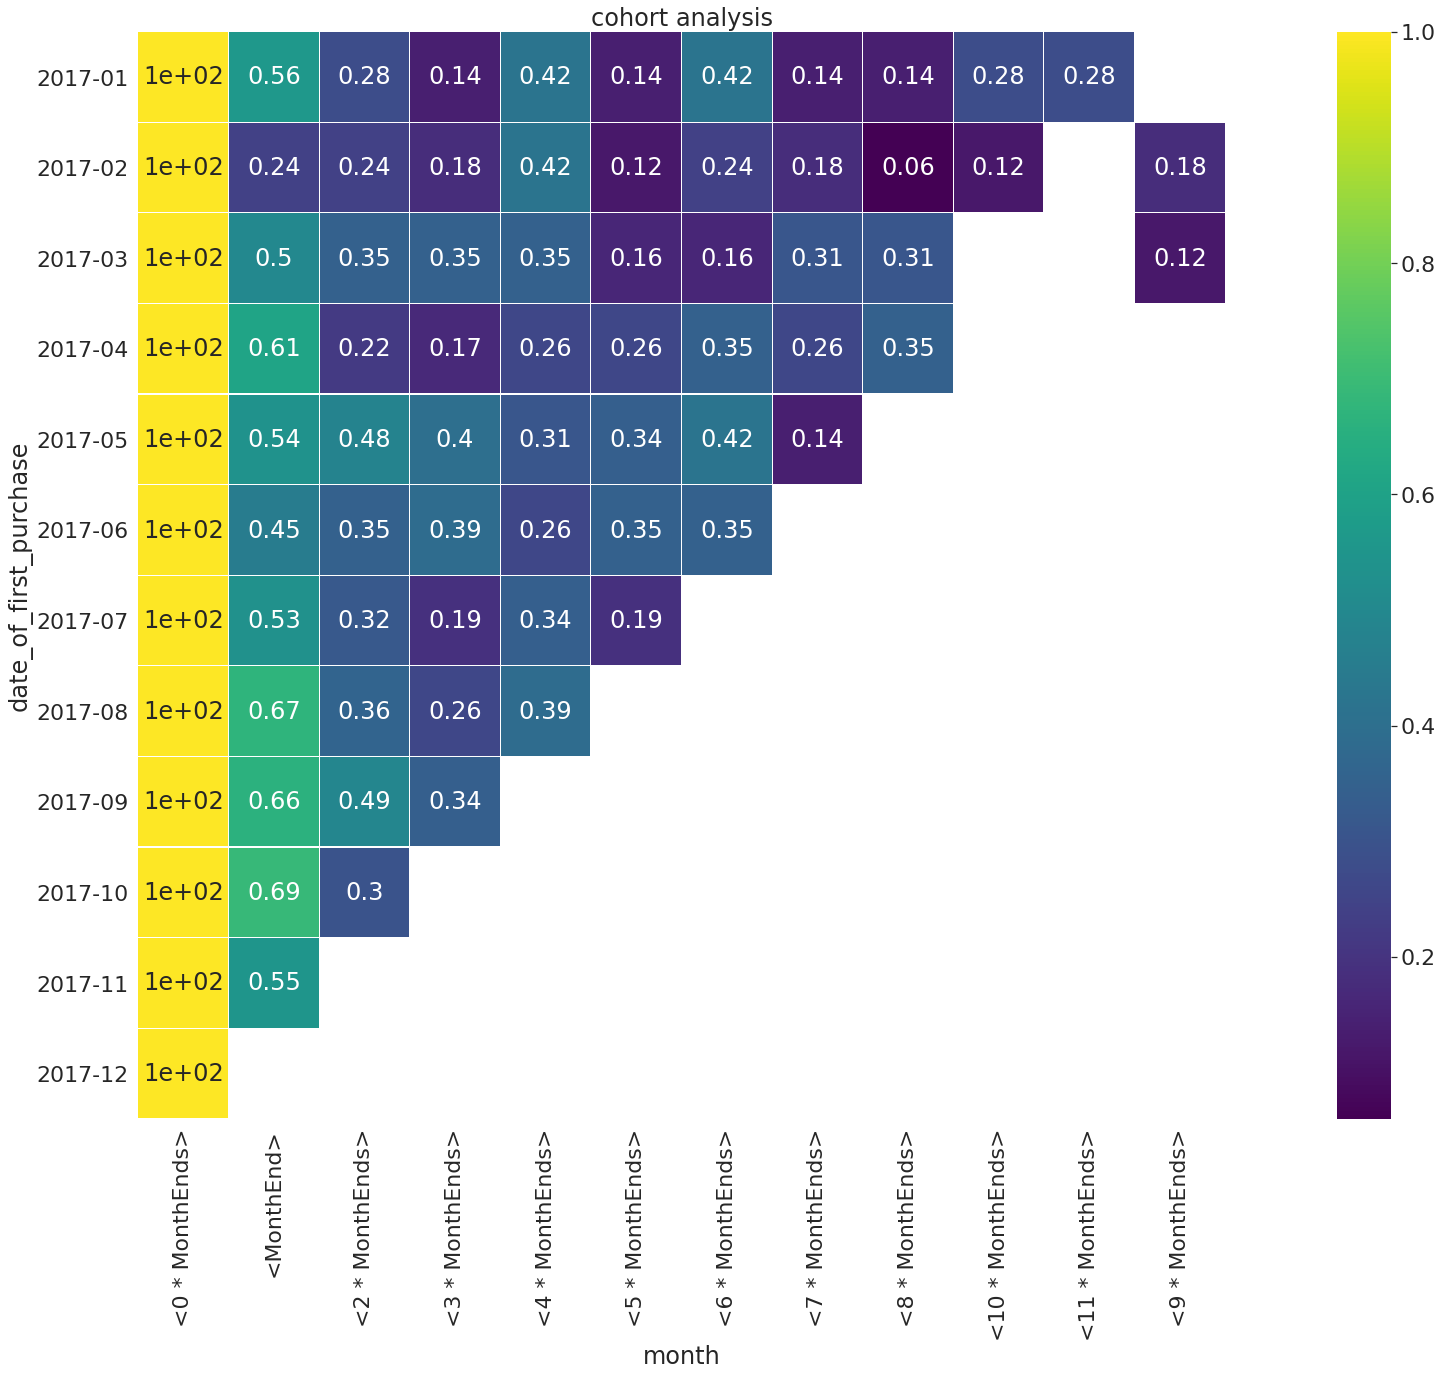

In [74]:
colormap = plt.cm.viridis
plt.figure(figsize=(40,20))
ax = sns.heatmap(cohort_analysis, linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

# plt.xticks(rotation=45)

ax.set_title('cohort analysis')

ax.set_xlabel('month')

In [182]:
# Найдём когорту с самым высоким retention на 3й месяц
cohort_analysis.iloc[:,3].idxmax()

Period('2017-05', 'M')

# 6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю.

RFM-анализ делит пользователей на сегменты в зависимости от:

- Recency — насколько недавно была совершена последняя покупка, то есть разница между текущей датой и датой последнего платежа
- Frequency — суммарное количество покупок за всё время 
- Monetary — сумма покупок за всё время

Эти три показателя нужно рассчитать отдельно для каждого покупателя. 

In [3]:
# Объединим три датафрейма 
customers_orders_2 = customers.merge(order, on = 'customer_id', how = 'inner')
union_df = customers_orders_2.merge(order_items, on = 'order_id', how = 'inner')
union_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07


Будем опираться на дату подтверждения оплаты заказа (order_approved_at ), поскольку некоторые товары ещё находятся в процессе доставки, а вместо текущей даты использовать последнюю дату подтверждения оплаты + 1 день.

In [4]:
last_day = union_df.order_approved_at.max()
today = last_day + timedelta(days=1)

Создаём таблицу RFM

Frequency (частота заказов будет совпадать с количеством упоминаний уникального user_id

In [5]:
# Frequency - частота заказов будет совпадать с количеством упоминаний уникального user_id
RFMtable = union_df \
    .groupby('customer_unique_id') \
    .agg({'order_approved_at': lambda x: (today - x.max()).days, 'product_id': 'count', 'price': 'sum'}) \
    .rename(columns={'order_approved_at': 'Recency', 'product_id': 'Frequency', 'price': 'Monetary'})

In [6]:
RFMtable.head()

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,117.0,1,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,119.0,1,18.90
0000f46a3911fa3c0805444483337064,542.0,1,69.00
0000f6ccb0745a6a4b88665a16c9f078,326.0,1,25.99
0004aac84e0df4da2b147fca70cf8255,293.0,1,180.00


Определим границы метрик

Мы будем разбивать на диапазон от 1 до 5.

In [7]:
quantile = RFMtable.quantile(q=[0.20, 0.40, 0.60, 0.80]).to_dict()
quantile

{'Recency': {0.2: 98.0, 0.4: 182.0, 0.6: 273.0, 0.8: 389.0},
 'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'Monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9}}

Напишем функцию, которая сегментирует покупателей

In [8]:
def to_segment (a,b,c):
    if a <= c[b][0.20]:
        return 1
    elif a <= c[b][0.40]:
        return 2
    elif a <= c[b][0.60]:
        return 3
    elif a <= c[b][0.80]:
        return 4
    else:
        return 5

Применяем функцию to_segment для каждого кластера

In [9]:
RFMtable['R_seg'] = RFMtable['Recency'].apply(to_segment, args=('Recency', quantile, ))# передадим дополнительные параметры использую args
RFMtable['F_seg'] = RFMtable['Frequency'].apply(to_segment, args=('Frequency', quantile, ))
RFMtable['M_seg'] = RFMtable['Monetary'].apply(to_segment, args=('Monetary', quantile, ))

In [10]:
RFMtable

,Recency,Frequency,Monetary,R_seg,F_seg,M_seg
customer_unique_id,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,117.0,1,129.90,2,1,4
0000b849f77a49e4a4ce2b2a4ca5be3f,119.0,1,18.90,2,1,1
0000f46a3911fa3c0805444483337064,542.0,1,69.00,5,1,2
0000f6ccb0745a6a4b88665a16c9f078,326.0,1,25.99,4,1,1
0004aac84e0df4da2b147fca70cf8255,293.0,1,180.00,4,1,5
...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,452.0,2,1570.00,5,5,5
fffea47cd6d3cc0a88bd621562a9d061,267.0,1,64.89,3,1,2
ffff371b4d645b6ecea244b27531430a,574.0,1,89.90,5,1,3


Найдём RFM сегмент

In [11]:
RFMtable['RFMseg'] = RFMtable.R_seg.map(str) + RFMtable.F_seg.map(str) + RFMtable.M_seg.map(str)

In [29]:
RFM_claster_summary = RFMtable.groupby('RFMseg', as_index=False) \
    .agg({'customer_unique_id':'count'}) \
    .sort_values('customer_unique_id', ascending=False)\
    .reset_index(drop = True)
RFM_claster_summary

,RFMseg,customer_unique_id
0,511,3990
1,311,3904
2,412,3901
3,111,3836
4,512,3744
5,312,3645
6,411,3619
7,211,3615
8,112,3586
9,212,3578


In [77]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(28,10)}
        )

Text(0.5, 0, 'RFM')

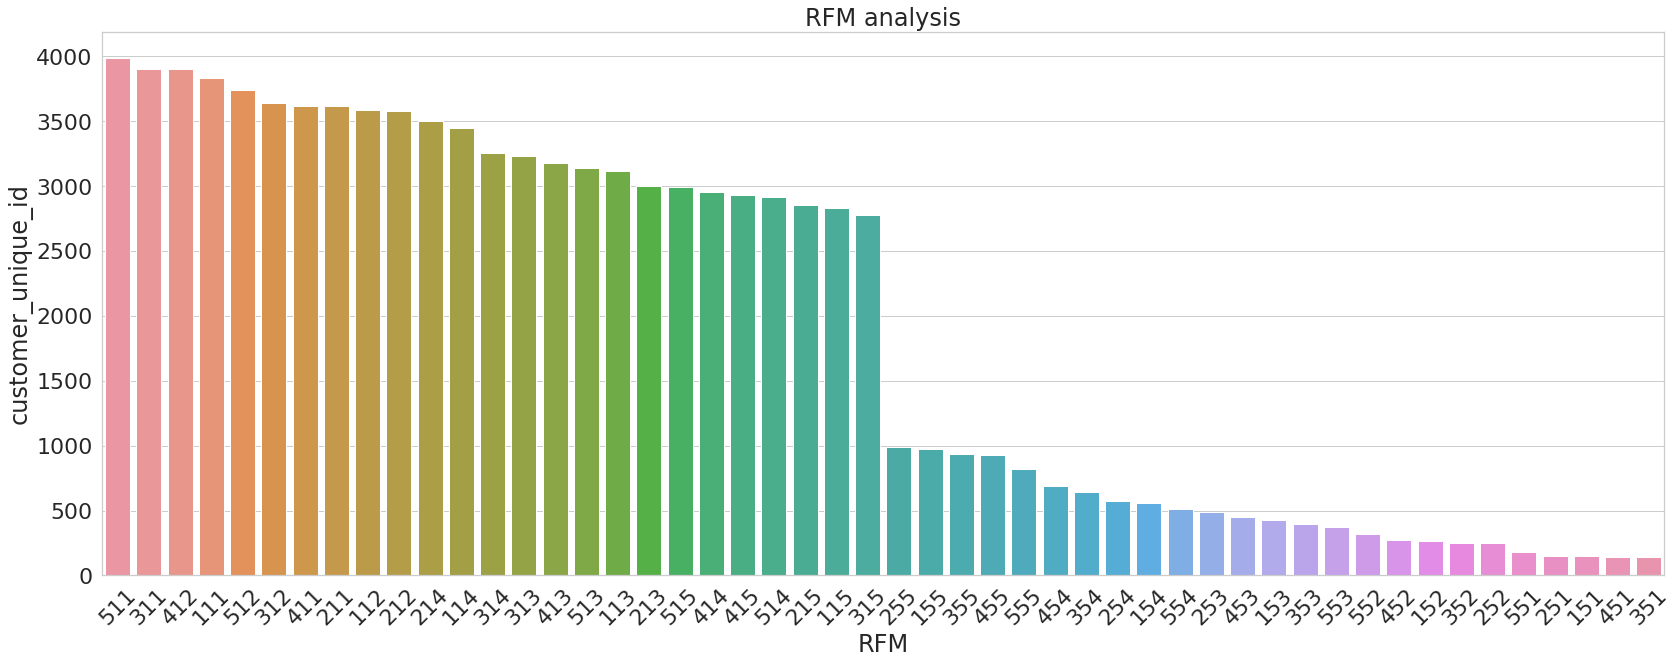

In [78]:
ax = sns.barplot(data = RFM_claster_summary, x= 'RFMseg', y = 'customer_unique_id') 

plt.xticks(rotation=45)

ax.set_title('RFM analysis')

ax.set_xlabel('RFM')

- В ходе анализа получили для каждого клиента трехзначный код, комбинация которого может определить его лояльность.

- Чем выше каждая цифра в коде RFM, тем более лояльный клиент. Мы посчитали количество пользователей, которые попадают под каждый из вариантов комбинации и получили результат, который показал, что клиентов, совершивших одноразовую покупку и потратили небольшое количество денег большинство